### Dataset: lengths and widths of petals and sepals in centimeters(cm).
### Output: species namely setosa, versicolor, virginica
### Goal: Predict the species of iris flowers
#### [indicates supervised learning problem and example of (3-class) classification problem ]

### 1. Introduction of data

In [1]:
#Importing the dataset into iris_dataset(sklearn-library, datasets-module, load_iris-function, returns-Bunch object)
from sklearn.datasets import load_iris
iris_dataset=load_iris()

In [2]:
#Display keys of loaded dataset which is in the form of Bunch(Dict)
#Bunch object is a dictionary like object and keys represent key in (key,value) pair
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
#Display the description of the dataset, DESCR-string
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
#Display the species(3-classes) 
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [5]:
#Display the feature names(column_names)
print("Feature names: {}".format(iris_dataset['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
#Display the type and dimensions(rows=samples, cols=features) of data
print("Type of data: {}".format(type(iris_dataset['data'])))
print("Shape of data: {}".format(iris_dataset['data'].shape))

Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)


In [7]:
#Display first few samples of data
print("First five samples of data:\n {}".format(iris_dataset['data'][:5]))

First five samples of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [8]:
#Display shape(indicates 1d array), type and target values of data(indicates 0-setosa, 1-versicolor, 2-virginica)
print("Shape of target: {}".format(iris_dataset['target'].shape))
print("Type of target: {}".format(type(iris_dataset['target'])))
print("Target:\n {}".format(iris_dataset['target']))

Shape of target: (150,)
Type of target: <class 'numpy.ndarray'>
Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 2. Splitting the dataset into train and test sets

In [9]:
#Splitting the dataset using train_test_split-function, model_selection-module, scikit-learn-library, random-constant
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [10]:
#Dimensions of train and test sets
print("X_train shape:{}".format(X_train.shape))
print("X_test shape:{}".format(X_test.shape))
print("y_train shape:{}".format(y_train.shape))
print("y_test shape:{}".format(y_test.shape))

X_train shape:(112, 4)
X_test shape:(38, 4)
y_train shape:(112,)
y_test shape:(38,)


### 3. Inspection of data to find abnormalities through visualization

In [11]:
#to create a plot, convert NumPy array into pandas DataFrame.
#1. create dataframe from data in X_train
#2. name the columns using feature_names
#3. scatter matrix from data frame, color by y_train
import pandas as pd
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
...,...,...,...,...
107,4.9,3.1,1.5,0.1
108,6.3,2.9,5.6,1.8
109,5.8,2.7,4.1,1.0
110,7.7,3.8,6.7,2.2


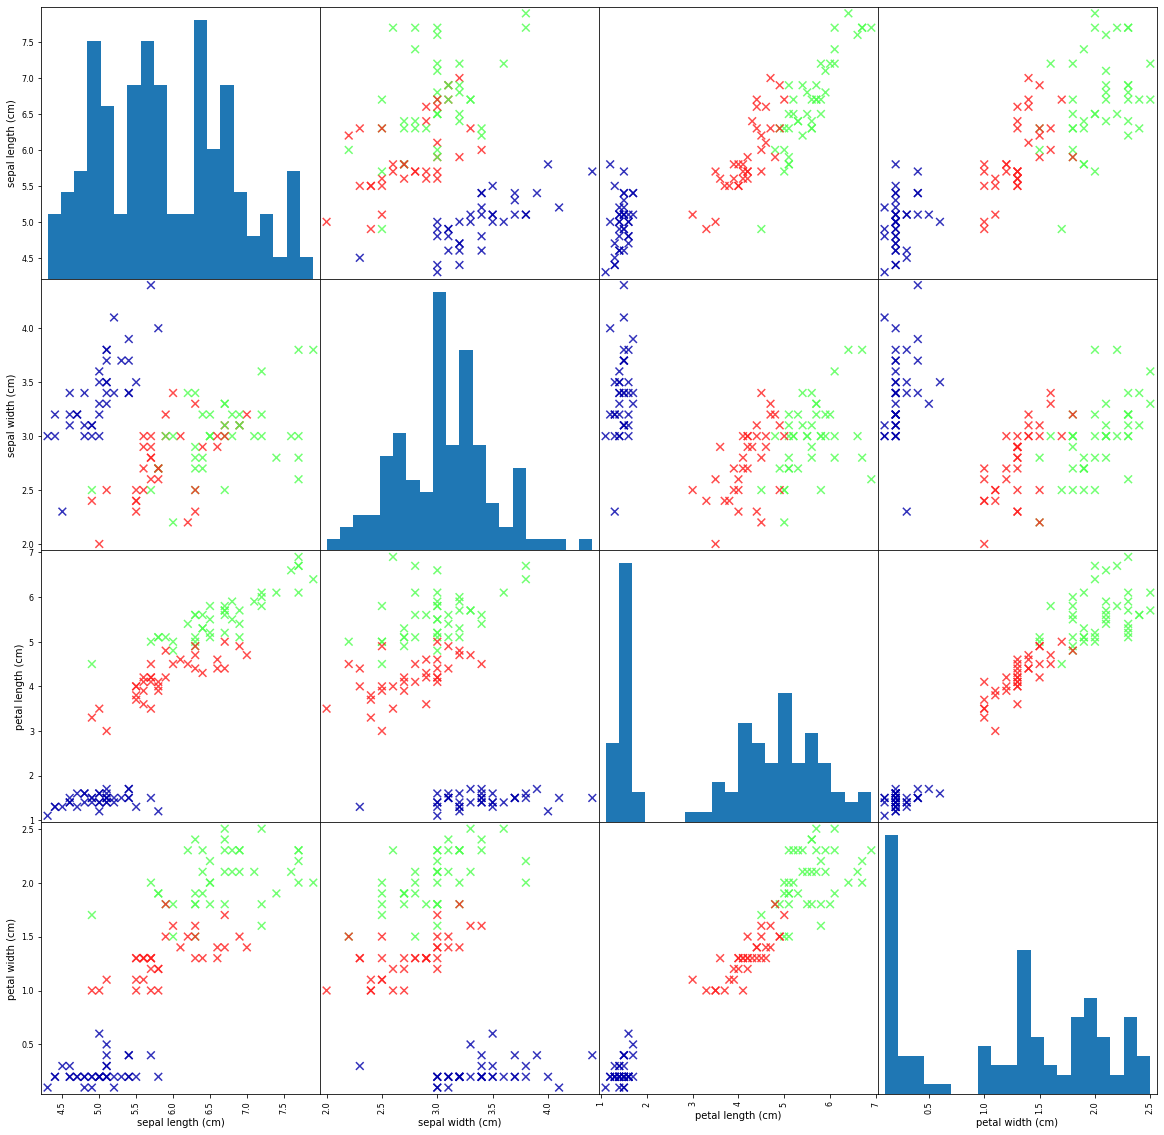

In [35]:
from pandas.plotting import scatter_matrix
import mglearn
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(20,20), marker='x', hist_kwds={'bins':20}, s=60, alpha=0.8, cmap=mglearn.cm3)

#### [Observation: Data seems to be well separated from each other and likely to be differentiated by the algorithm]

### 4. Building machine learning model: k-nearest neighbors classifier

In [44]:
#Importing classifier from library (sklearn-library, neighbors-module, KNeighborsClassifier-class)
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [49]:
#Instantiating the class into an object
knn = KNeighborsClassifier(n_neighbors=1)

In [50]:
#Building the model using fit method
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### 5. Evaluating the built model

In [52]:
#Predicting the target values for test set
y_pred = knn.predict(X_test)
print("Predicted target values:\n{}".format(y_pred))

Predicted target values:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [55]:
import numpy as np
#Calculating the accuracy using mean from numpy and score from knn
print("Test score(np.mean):{}".format(np.mean(y_pred==y_test)))
print("Test score(knn.score):{}".format(knn.score(X_test,y_test)))

Test score(np.mean):0.9736842105263158
Test score(knn.score):0.9736842105263158


#### Summary: Model can predict the labels correctly 97% of the time.